The notebook is a compilation of the usual machine learning metrics. 

Note that the metrics are deeply related to the loss function that ML algorithm actually is optimizing, but the two are different. Oftentimes, it is actually the metric that we want to truly optimize, but we cannot since it is not differentiable. For instance, the accuracy metric is actually equivalent to a 0-1 loss function, but it is not differentiable and hence cannot be used in ML algorithm. The loss function used instead, such as cross-entropy, is a differentiable alternative or proxy to the metric. After the ML algo has run using these loss function as proxy, however, we can go back to inspect the performance on the original metric to see if our true purpose has been served

## Classification




### The Confusion Matrix

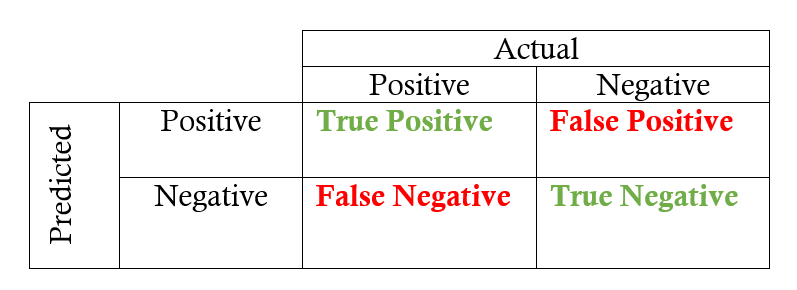

### Accuracy

Accuracy is the quintessential classification metric. It is pretty easy to understand. And easily suited for binary as well as a multiclass classification problem. *Accuracy is the proportion of true results among the total number of cases examined.*
$$Accuracy = (TP+TN)/(TP+FP+FN+TN)$$

   **When to use?**
 
 > Accuracy is a valid choice of evaluation for classification problems which are well balanced and not skewed or No class imbalance.
 
   **Caveats**

 > Let us say that our target class is very sparse. Do we want accuracy as a metric of our model performance? What if we are predicting if an asteroid will hit the earth? Just say No all the time. And you will be 99% accurate. My model can be reasonably accurate, but not at all valuable.

### Precision

Let’s start with precision, which answers the following question: *what proportion of predicted Positives is truly Positive?*
$$Precision = (TP)/(TP+FP)$$

In the asteroid prediction problem, we never predicted a true positive. And thus precision=0

   **When to use?**
    
 > Precision is a valid choice of evaluation metric when we want to be very sure of our prediction. For example: If we are building a system to predict if we should decrease the credit limit on a particular account, we want to be very sure about our prediction or it may result in customer dissatisfaction.

   **Caveats**
    
 > Being very precise means our model will leave a lot of credit defaulters untouched and hence lose money.

### Recall

Another very useful measure is recall, which answers a different question: what proportion of actual Positives is correctly classified?
$$Recall = (TP)/(TP+FN)$$

In the asteroid prediction problem, we never predicted a true positive.And thus recall is also equal to 0.

**When to use?**
 > Recall is a valid choice of evaluation metric when we want to capture as many positives as possible. For example: If we are building a system to predict if a person has cancer or not, we want to capture the disease even if we are not very sure.

**Caveats**

 > Recall is 1 if we predict 1 for all examples.

### F1 Score and F beta Score

The F1 score is a number between 0 and 1 and is the *harmonic mean of precision and recall*, which explicitly take into account the tradeoff between precision and recall.

$$F_1=2\times\frac{precision*recall}{precision+recall}$$

**When to use?**
 > We want to have a model with both good precision and recall.

**Caveats**

 > The main problem with the F1 score is that it gives equal weight to precision and recall. We might sometimes need to include domain knowledge in our evaluation where we want to have more recall or more precision.
To solve this, we can do this by creating a weighted F1 metric as below where beta manages the tradeoff between precision and recall. Here we give β times as much importance to recall as precision.

$$F_{\beta}=(1+\beta^2)\frac{precision*recall}{\beta^2\cdot precision+recall}$$

  

### Implementation of the Scores

The above scores for classfication can be easily computed using `sklearn`.

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

y_true = [0, 1, 1, 0, 1, 1]
y_pred = [0, 0, 1, 0, 0, 1]

print("Confusion matrix:")
print(confusion_matrix(y_true, y_pred))
print("F1 score:")
print(f1_score(y_true, y_pred))
print("F beta score")
print(fbeta_score(y_true, y_pred,beta=1.0))

Confusion matrix:
[[2 0]
 [2 2]]
F1 score:
0.6666666666666666
F beta score
0.6666666666666666


### AUC and ROC

AUC, or Area Under Curve is the area under the ROC curve. AUC and ROC indicates *how well the probabilities from the positive classes are separated from the negative classes*. 

These methods are for classifiers that produce class probabilities. Given the class probs, one can use various threshold values to plot our *sensitivity, or TPR* and *(1-specificity) or FPR* on the cure and we will have a ROC curve. Here True positive rate or TPR is just the proportion of trues we are capturing using our algorithm, i.e. the recall.

$$Sensitivty = TPR = Recall = TP/(TP+FN)=P(model\;predicts\;1|ground\;truth\;is\;1)$$

and False positive rate or FPR is just the proportion of false we are capturing using our algorithm.

$$1- Specificity = FPR = FP/(TN+FP)=P(model\;predicts\;1|ground\;truth\;is\;0)$$.

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives, and decreasing both False Negative and True Negative  (from bottom left to bottom top right).

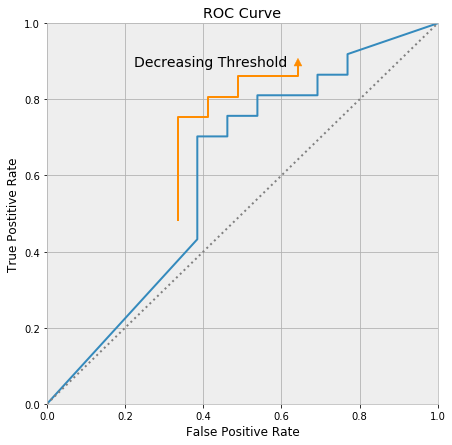

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the *probability that the model ranks a random positive example more highly than a random negative example*. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

Here we can use the ROC curves to decide on a Threshold value. The choice of threshold value will also depend on how the classifier is intended to be used, sometimes depending on the imbalance of the class, whether we care more about sensitivity or specificity, etc.

**When to Use?**
 > AOC is **scale-invariant**. It measures how well predictions are ranked, rather than their specific model probability values.

 > Another benefit of using AUC is that it is **classification-threshold-invariant** like log loss. Just recall that it is a probability, and that probability is not a function of the threshold. It measures the quality of the model’s predictions irrespective of what classification threshold is chosen, unlike F1 score or accuracy which depend on the choice of threshold.


**Caveats**
 > Sometimes we will need well-calibrated probability outputs from our models and AUC doesn’t help with that.


In [ ]:
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print(roc_auc_score(y_true, y_scores))


## Regression

These should be all familiar. Some of them are differentiable and hence can be directly used as the loss function.

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

## Reference

- Medium post: [The 5 Classification Evaluation Metrics You Must Know](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)
- [Blog post about AUC and ROC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
- [Continuous Proof that AUC is the probability](https://www.alexejgossmann.com/auc/)
- [Geometric Proof of the same above](https://madrury.github.io/jekyll/update/statistics/2017/06/21/auc-proof.html)
- `scikit-learn.metrics`: [link](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)